In [1]:
from templateflow.api import get
import nibabel as nib
from matplotlib import colormaps
from os.path import join, dirname, abspath, basename

brain_template = get('fsaverage', density='164k', suffix='pial', hemi='L')


def gifti_to_obj(gifti_file, obj_file):
    # Load the GIFTI file
    gii = nib.load(gifti_file)
    with open(obj_file, 'w') as fp:
        # Write the vertices
        for vertex in gii.darrays[0].data:
            fp.write(f'v {vertex[0]} {vertex[1]} {vertex[2]}\n')
        # Write the faces
        for triangle in gii.darrays[1].data:
            fp.write(f'f {triangle[0]+1} {triangle[1]+1} {triangle[2]+1}\n')
            
# Usage
gifti_to_obj(brain_template, dirname(brain_template) + '.obj')

In [2]:
import bpy

def process_obj(obj_filepath):
    # Clear existing mesh objects in the scene
    bpy.ops.object.select_all(action='DESELECT')
    bpy.ops.object.select_by_type(type='MESH')
    bpy.ops.object.delete()

    # Import the OBJ file
    bpy.ops.import_scene.obj(filepath=obj_filepath)
    imported_objects = bpy.context.selected_objects

    # Assume the first imported object is the desired mesh
    mesh = imported_objects[0]
    bpy.context.view_layer.objects.active = mesh

    # Position the camera
    camera = bpy.data.objects['Camera']
    camera.location = (1, 1, 1)
    camera.rotation_euler = (1, 0, 1)
    # Set the camera to be the active object
    bpy.context.view_layer.objects.active = camera
    # Change the lens focal length to zoom out
    bpy.data.cameras[camera.data.name].lens = 50  # default is usually 50

    # Adjust the clipping settings
    bpy.data.cameras[camera.data.name].clip_start = 0.001  # Adjust this value
    bpy.data.cameras[camera.data.name].clip_end = 10  # Adjust this value

    # Position the light
    light = bpy.data.objects['Light']
    light.location = (5, 5, 5)

    # Create a new material (red color)
    mat = bpy.data.materials.new(name="Red_Material")
    mat.diffuse_color = (1, 0, 0, 1)  # Red color

    # Assign the material to the mesh
    mesh.data.materials.append(mat)

    # Set the rendering engine and output type
    bpy.context.scene.render.engine = 'CYCLES'
    bpy.context.scene.cycles.device = 'GPU'
    bpy.context.scene.render.image_settings.file_format = 'PNG'

    # Render the image
    # Set the output path and filename
    bpy.context.scene.render.filepath = '/tmp/render'
    bpy.ops.render.render(write_still=True)

# Usage
process_obj(dirname(brain_template) + '.obj')


Device with name Apple M1 Max supports metal minimum requirements
(  0.0000 sec |   0.0000 sec) Importing OBJ '/Users/leonmartin_bih/.cache/templateflow/tpl-fsaverage.obj'...
  (  0.0001 sec |   0.0000 sec) Parsing OBJ file...
    (  1.3072 sec |   1.3071 sec) Done, loading materials and images...
    (  1.3093 sec |   1.3092 sec) Done, building geometries (verts:163842 faces:327680 materials: 1 smoothgroups:0) ...
    (  1.8587 sec |   1.8587 sec) Done.
  (  1.8589 sec |   1.8588 sec) Finished importing: '/Users/leonmartin_bih/.cache/templateflow/tpl-fsaverage.obj'
Progress: 100.00%

Fra:1 Mem:39.49M (Peak 39.49M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Synchronizing object | tpl-fsaverage
Fra:1 Mem:59.18M (Peak 61.68M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Initializing
Fra:1 Mem:51.53M (Peak 61.68M) | Time:00:00.00 | Mem:0.00M, Peak:0.00M | Scene, ViewLayer | Waiting for render to start
Fra:1 Mem:51.53M (Peak 61.68M) | Time:00:00.00 | Mem:0

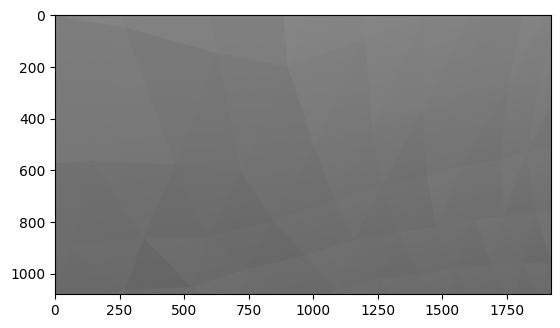

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Load the rendered image
img = mpimg.imread('/tmp/render.png')
# Display the image in a Matplotlib figure
fig, ax = plt.subplots()
ax.imshow(img)
plt.show()